In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import japanize_matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

os.chdir("../")

RATE_A = "RateA"
RATE_S = "RateS"
df = pd.read_csv("csv/GReeeeN_20231119.csv")

In [2]:
def preprocess(df, csv_path:str):
    rates = pd.merge(df, pd.read_csv(csv_path), on='song')
    rates = rates.dropna(subset=["numerator_A", "denominator_A", "numerator_S", "denominator_S"])

    rates[RATE_A] = rates.numerator_A / rates.denominator_A
    rates[RATE_S] = rates.numerator_S / rates.denominator_S

    x_max = rates.RateA.max()
    x_min = rates.RateA.min()
    y_max = rates.RateS.max()
    y_min = rates.RateS.min()

    xy_max = max(x_max, y_max)
    xy_max += xy_max / xy_max / 100
    xy_min = min(x_min, y_min)
    xy_min -= xy_min / xy_min / 100

    return (rates, xy_min, xy_max)

In [3]:
def scatter(rates:pd.DataFrame, xy_min:int, xy_max:int, subset:list, sort_by:str, xlabel:str, ylabel:str):
    sorted_rates = rates.dropna(subset=subset).sort_values(sort_by, ascending=False)
    center = len(sorted_rates) // 2
    pop_youtube = sorted_rates[:center]
    unpop_youtube = sorted_rates[center:]

    plt.scatter(x=RATE_A, y=RATE_S, data=pop_youtube, color='blue', label='人気曲')
    plt.scatter(x=RATE_A, y=RATE_S, data=unpop_youtube, color='red', label='普通曲')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.xlim(xy_min, xy_max)
    plt.ylim(xy_min, xy_max)
    plt.minorticks_on()
    plt.grid(which='major', color='gray', linestyle='solid')
    plt.grid(which='minor', color='lightgray', linestyle='dotted')

# 単語の一致率

In [4]:
rates_wmr, xy_min_wmr, xy_max_wmr = preprocess(df, "csv/GReeeeN_wmr_20231119.csv")

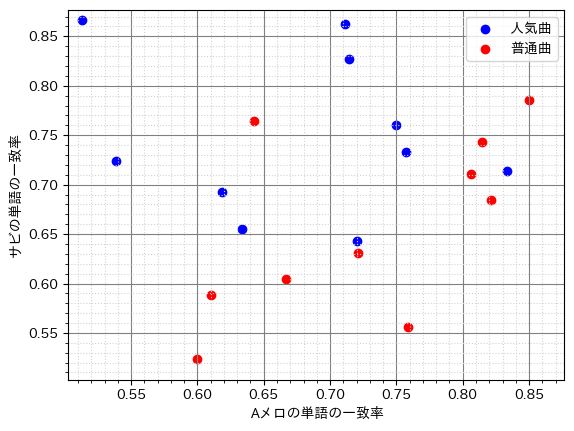

In [5]:
scatter(rates_wmr, xy_min_wmr, xy_max_wmr, ["youtube_url"], "youtube_play_times", "Aメロの単語の一致率", "サビの単語の一致率")

## t検定(サビ，軸回転なし)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [6]:
sorted_rates = rates_wmr.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
center = len(sorted_rates) // 2
pop_youtube = sorted_rates[:center]
unpop_youtube = sorted_rates[center:]

stats.ttest_ind(pop_youtube[RATE_S], unpop_youtube[RATE_S], equal_var=False)

TtestResult(statistic=2.3042795060515795, pvalue=0.0335469401057381, df=17.711709598517377)

# 木構造の類似度計算（親子）

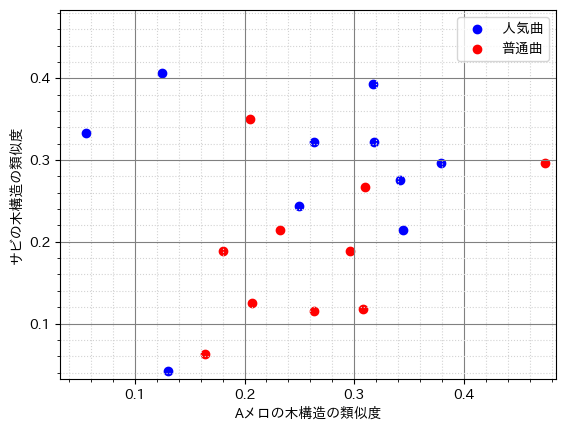

In [7]:
rates_ts, xy_min_tspc, xy_max_tspc = preprocess(df, "csv/GReeeeN_tspc_20231119.csv")
scatter(rates_ts, xy_min_tspc, xy_max_tspc, ["youtube_url"], "youtube_play_times", "Aメロの木構造の類似度", "サビの木構造の類似度")

## t検定(サビ，軸回転なし)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [8]:
sorted_rates = rates_ts.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
center = len(sorted_rates) // 2
pop_youtube = sorted_rates[:center]
unpop_youtube = sorted_rates[center:]

stats.ttest_ind(pop_youtube[RATE_S], unpop_youtube[RATE_S], equal_var=False)

TtestResult(statistic=2.107421138570833, pvalue=0.04962899679596903, df=17.684812768440647)

## head2, tail2

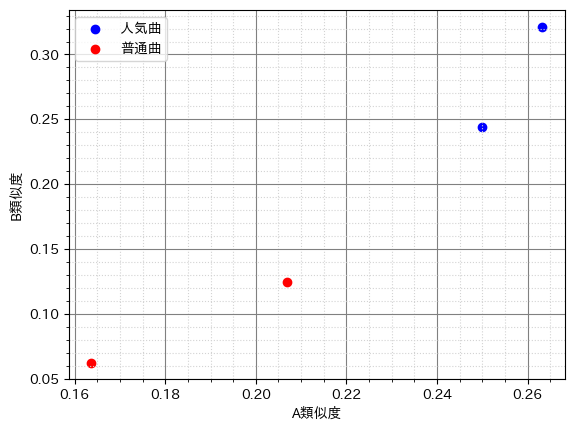

In [10]:
sorted_rates = rates_ts.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
plt.scatter(x=RATE_A, y=RATE_S, data=sorted_rates.head(2), color='blue', label='人気曲')
plt.scatter(x=RATE_A, y=RATE_S, data=sorted_rates.tail(2), color='red', label='普通曲')

plt.xlabel("A類似度")
plt.ylabel("B類似度")
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')